In [4]:
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('raster_cuda_final.csv')
#df = pd.read_csv('raster_tbb_final.csv')
#df = pd.read_csv('ray_cuda_final.csv')
#df = pd.read_csv('ray_tbb_final.csv')
#f = pd.read_csv('vol_cuda_final.csv')
#df = pd.read_csv('vol_tbb_final.csv')

In [6]:
df.iloc[0]

Cores                   16.000000
Render_composite         0.020070
Resolution            1084.000000
Base                   217.000000
Camera Angle             0.000000
Memory Transfer          0.053620
Init buffer              0.000238
Cull                     0.000840
Rasterize                0.001005
Write Surface            0.000302
Total Render             0.002429
pixels              331436.000000
actual pixels       215120.000000
objects             482232.000000
rank                     0.000000
frame                    1.000000
 ssp                     1.000000
Name: 0, dtype: float64

In [7]:
list(df)


['Cores',
 'Render_composite',
 'Resolution',
 'Base',
 'Camera Angle',
 'Memory Transfer',
 'Init buffer',
 'Cull',
 'Rasterize',
 'Write Surface',
 'Total Render',
 'pixels',
 'actual pixels',
 'objects',
 'rank',
 'frame',
 ' ssp']

In [8]:
df.describe()

,Cores,Render_composite,Resolution,Base,Camera Angle,Memory Transfer,Init buffer,Cull,Rasterize,Write Surface,Total Render,pixels,actual pixels,objects,rank,frame,ssp
count,95580.000000,95580.000000,95580.000000,95580.000000,95580.0,95580.000000,95580.000000,95580.000000,95580.000000,95580.000000,95580.000000,9.558000e+04,9.558000e+04,9.558000e+04,95580.000000,95580.000000,95580.000000
mean,44.666667,0.044615,1697.385405,223.871375,0.0,0.125018,0.000356,0.000984,0.001038,0.000788,0.003206,3.696708e+05,2.405251e+05,3.798339e+05,21.833333,5.000000,1.878814
std,22.250405,0.032585,684.765809,55.553708,0.0,0.168667,0.000119,0.000243,0.000715,0.000533,0.001235,5.800530e+05,3.631464e+05,2.425154e+05,18.199025,2.582002,4.407975
min,1.000000,0.005104,528.000000,129.000000,0.0,0.008367,0.000183,0.000549,0.000254,0.000090,0.001212,6.864000e+03,5.024000e+03,1.945600e+04,0.000000,1.000000,0.000000
25%,27.000000,0.017415,1103.000000,175.000000,0.0,0.038089,0.000254,0.000797,0.000596,0.000305,0.002255,8.547525e+04,5.682675e+04,2.003415e+05,6.000000,3.000000,0.000000
50%,64.000000,0.037009,1707.500000,224.000000,0.0,0.059363,0.000335,0.000970,0.000857,0.000691,0.002966,2.027640e+05,1.349190e+05,3.305770e+05,17.000000,5.000000,0.000000
75%,64.000000,0.065394,2283.000000,271.000000,0.0,0.122818,0.000445,0.001159,0.001244,0.001205,0.003969,4.179290e+05,2.752760e+05,5.275902e+05,34.000000,7.000000,2.000000
max,64.000000,0.189291,2857.000000,319.000000,0.0,1.190050,0.000997,0.002423,0.008739,0.001924,0.012624,7.774172e+06,4.785852e+06,1.220952e+06,63.000000,9.000000,92.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95580 entries, 0 to 95579
Data columns (total 17 columns):
Cores               95580 non-null int64
Render_composite    95580 non-null float64
Resolution          95580 non-null int64
Base                95580 non-null int64
Camera Angle        95580 non-null int64
Memory Transfer     95580 non-null float64
Init buffer         95580 non-null float64
Cull                95580 non-null float64
Rasterize           95580 non-null float64
Write Surface       95580 non-null float64
Total Render        95580 non-null float64
pixels              95580 non-null int64
actual pixels       95580 non-null int64
objects             95580 non-null int64
rank                95580 non-null int64
frame               95580 non-null int64
 ssp                95580 non-null int64
dtypes: float64(7), int64(10)
memory usage: 12.4 MB


In [10]:
singleCore = df[(df['Cores'] == 1)]

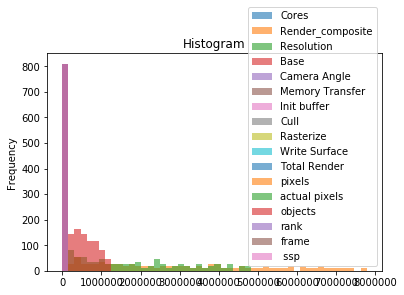

In [11]:
singleCore.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

#subplot arguments(numRows, numCols, index)

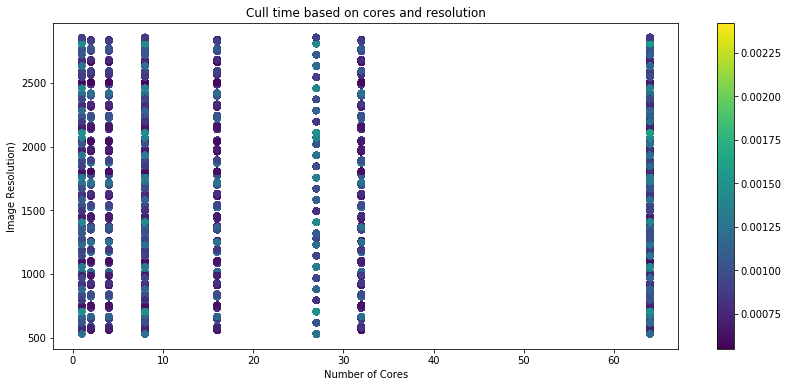

In [12]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(df.Cores, df.Resolution, c=df['Cull'])
plt.xlabel('Number of Cores')
plt.ylabel('Image Resolution)')
plt.title('Cull time based on cores and resolution')
plt.colorbar(p1)
plt.draw()
plt.show()

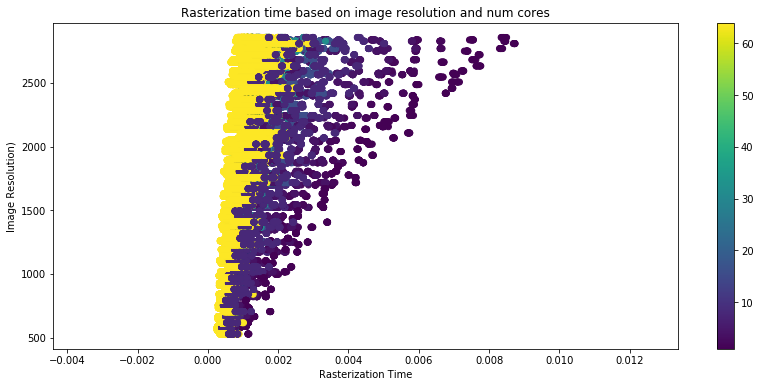

In [13]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(df.Rasterize, df.Resolution, c=df['Cores'])
plt.xlabel('Rasterization Time')
plt.ylabel('Image Resolution)')
plt.title('Rasterization time based on image resolution and num cores')
plt.colorbar(p1)
plt.draw()
plt.show()

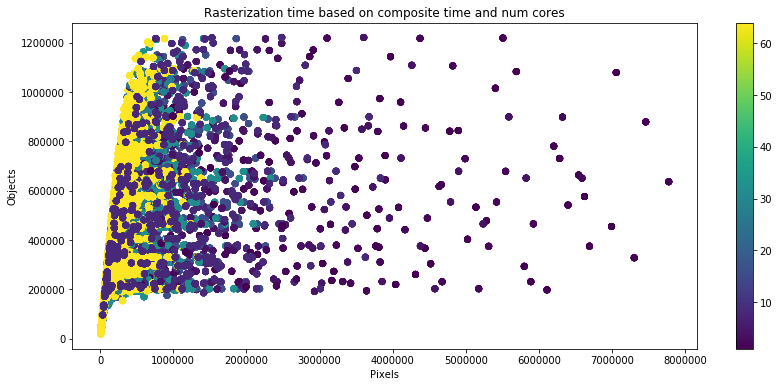

In [14]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(df.pixels, df.objects, c=df['Cores'])
plt.xlabel('Pixels')
plt.ylabel('Objects')
plt.title('Rasterization time based on composite time and num cores')
plt.colorbar(p1)
plt.draw()
plt.show()

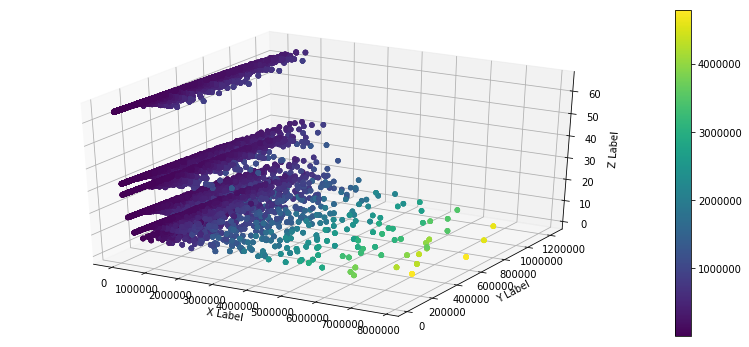

In [15]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df.pixels, df.objects, df['Cores'], c=df['actual pixels'])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.colorbar(p)
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
X = df[['Cores', 'Resolution',  'Cull',  'Render_composite']]
km = KMeans(n_clusters=3, init='random')
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
km.__dict__

{'n_clusters': 3,
 'init': 'random',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 1,
 'algorithm': 'auto',
 'cluster_centers_': array([[4.46666667e+01, 2.48670678e+03, 9.77713676e-04, 8.14009535e-02],
        [4.46666667e+01, 1.69740678e+03, 9.78629785e-04, 3.82083752e-02],
        [4.46666667e+01, 9.08042655e+02, 9.97021889e-04, 1.42366477e-02]]),
 'labels_': array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 'inertia_': 5164281085.57127,
 'n_iter_': 3}

In [19]:
centers = km.cluster_centers_
centers

array([[4.46666667e+01, 2.48670678e+03, 9.77713676e-04, 8.14009535e-02],
       [4.46666667e+01, 1.69740678e+03, 9.78629785e-04, 3.82083752e-02],
       [4.46666667e+01, 9.08042655e+02, 9.97021889e-04, 1.42366477e-02]])

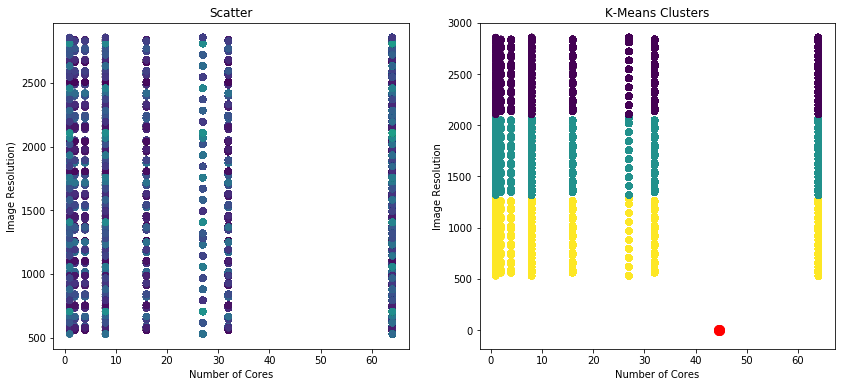

In [20]:
plt.figure(figsize = (14,6))
plt.subplot(121)
plt.scatter(df.Cores, df.Resolution, c=df['Cull'])
plt.xlabel('Number of Cores')
plt.ylabel('Image Resolution)')
plt.title('Scatter')

plt.subplot(122)
plt.scatter(df.Cores, df.Resolution, c=km.labels_)
plt.scatter(centers[:,0], centers[:,2], marker='o', c='r', s=100)
plt.xlabel('Number of Cores')
plt.ylabel('Image Resolution')
plt.title('K-Means Clusters')
plt.draw()
plt.show()

In [21]:
#From Matt's paper
# Raterization Model -> O + (VO*PPT)
# O -> objects
# VO -> min(AP, O)
# AP -> 55% * 1/numMPiTasks^1/3 * pixels
# PPT -> AP * 4
#df = pd.read_csv('raster_cuda_final.csv')
#df = df[(df['Cores'] == 64)]

cores = df['Cores']
objects = df['objects']
pixels = df['pixels']
#actualPixels = df['actual pixels']
activePixels = .55 * (1/cores**(1/3)) * pixels
#visibleObjects = min(activePixels, objects)
#tt = pd.DataFrame([activePixels, objects])
#visibleObjects = tt.min(axis=1)
#cheat on this for now
visibleObjects = activePixels
ppt = activePixels*4
secondParam = ppt*visibleObjects
secondParam.name = "secondParam"

tempX = [objects, secondParam]
X =  pd.DataFrame(tempX)
X = X.T # transpose tow/columns


#mean = X.mean(axis=0)
#std = X.std(axis=0)
#X = (X - mean) / std

#X = df[['pixels', 'objects']]
y = df['Total Render']

# Trying using single core data only for now for speed and simplicity
#X = singleCore[['pixels', 'objects']]
#y = singleCore['Total Render']

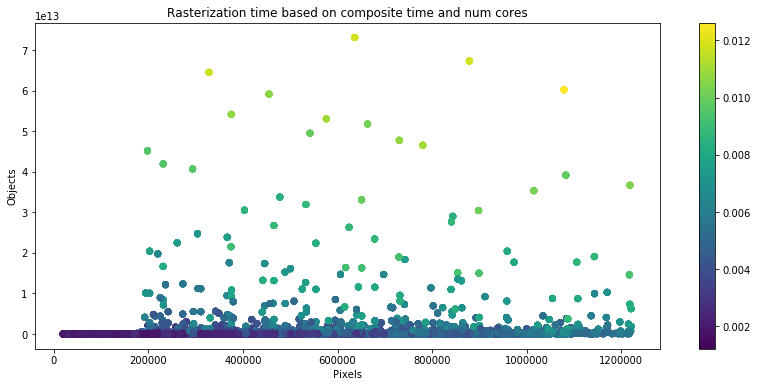

In [22]:
plt.figure(figsize = (14,6))
p1 = plt.scatter(X.objects, X.secondParam, c=y)
plt.xlabel('Pixels')
plt.ylabel('Objects')
plt.title('Rasterization time based on composite time and num cores')
plt.colorbar(p1)
plt.draw()
plt.show()

In [23]:
# Import function to create training and test set splits
from sklearn.cross_validation import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [24]:
# Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=20
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)
    print(test_score)

0.7320221789912595
0.742528802698995


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7503392063302882


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7499162827032526


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7501042289980242


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7504621598978554


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.7509358583563368


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, shuffle=True)

In [27]:
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [28]:
classifiers = [
    #linear_model.SGDRegressor(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.Ridge(),
    linear_model.LinearRegression(normalize=True)
    ]

In [29]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    print("coef values")
    print(clf.coef_)
    pred_test = clf.predict(X_test)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print(np.std(X_test, 0)*clf.coef_)
    
    #Do some cross validation with KFold
    scores = cross_val_score(clf, X, y, cv=3)
    print(scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    
    clf
   # print("Mean squared error: %.2f"  % mean_squared_error(X_test, y_test))
    #Do some predictions
    #predicted = cross_val_predict(clf, X, y, cv=10)
    #accuracyScores = metrics.accuracy_score(y, predicted) 
    #print(accuracyScores)
    #print(confusion_matrix(y_test, pred_test))
    #print(classification_report(y_test, pred_test))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
coef values
[3.70432021e-09 1.64802940e-16]
0.6999543505806618
0.7098505243792157
objects        0.000896
secondParam    0.000438
dtype: float64
[0.69613429 0.68337322 0.68327191]
Accuracy: 0.69 (+/- 0.01)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
coef values
[3.71289860e-09 1.64718597e-16]
0.6999628271003082
0.7098765851882165
objects        0.000898
secondParam    0.000438
dtype: float64
[0.6961485  0.68339232 0.68329722]
Accuracy: 0.69 (+/- 0.01)
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
coef values
[3.72147680e-09 1.64634255e-16]
0.69996

In [30]:
#Do some cross validation

In [31]:

#X = df[['actual pixels', 'objects', 'Write Surface', 'Rasterize', 'Cull', 'Init buffer', 'Memory Transfer']]
#X = df[['pixels', 'objects']]
#y = df['Total Render']


# Train test split
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=.2, random_state=0)

In [32]:
#Look at some simple neural networks
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.layers.advanced_activations import ReLU

In [33]:
model = Sequential()
model.add(Dense(32, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
#model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.compile(Adam(lr=0.05), 'mean_squared_error', metrics=['accuracy'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,273
Trainable params: 2,273
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3


InternalError: Blas GEMM launch failed : a.shape=(32, 2), b.shape=(2, 32), m=32, n=32, k=2
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/Adam/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_63, dense_1/kernel/read)]]
	 [[Node: metrics/acc/Mean_1/_85 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_447_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
results

In [ ]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

In [36]:
#Print model accuracy plot
def plot_loss(hist):
    loss = hist.history['loss']
    plt.plot(range(len(loss)), loss)
    plt.title('loss')
    plt.xlabel('epochs')
plot_loss(history)


NameError: name 'history' is not defined

In [37]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
train_data = (X_train - mean) / std
test_data = (X_test - mean) / std

print(train_data)

        objects  secondParam
29622 -1.363052    -0.107980
62548  1.119691    -0.082236
26795 -0.609847    -0.106988
37959 -1.163180    -0.107874
58843  0.289440    -0.106083
93610  0.958857    -0.100523
82231 -0.318960    -0.105978
75131 -1.244866    -0.107950
84577  0.834276    -0.106652
8931   0.150841    -0.096917
85647  1.013088    -0.100907
55639  1.106410    -0.104239
21502 -0.512507    -0.107378
9463   2.139199    -0.078832
30126 -1.175599    -0.107960
64741 -0.979791    -0.107898
27503  0.885227    -0.106184
74608 -0.208299    -0.054360
71117  0.707614    -0.105055
29575 -1.263408    -0.107967
75724 -0.782552    -0.107693
37810 -1.262288    -0.107924
65579 -0.715708    -0.107835
22626  0.274107    -0.104036
65936 -1.102913    -0.107926
60295  0.665230    -0.103798
62438  1.092610    -0.096195
63529 -1.475559    -0.107988
24525 -0.197725    -0.107147
4248   0.176858    -0.105822
...         ...          ...
75907 -0.235169    -0.106790
68362 -0.867262    -0.107434
46892 -1.33045

In [38]:
print(X_train)

        objects   secondParam
29622   48942.0  2.420935e+07
62548  651468.0  6.467167e+10
26795  231734.0  2.516026e+09
37959   97448.0  2.916328e+08
58843  449978.0  4.788626e+09
93610  612436.0  1.875169e+10
82231  302328.0  5.052729e+09
75131   77624.0  9.946738e+07
84577  582202.0  3.361031e+09
8931   416342.0  2.780659e+10
85647  625597.0  1.778566e+10
55639  648245.0  9.418538e+09
21502  255357.0  1.535789e+09
9463   898888.0  7.321943e+10
30126   94434.0  7.420746e+07
64741  141954.0  2.316865e+08
27503  594567.0  4.534575e+09
74608  329184.0  1.346715e+11
71117  551463.0  7.370451e+09
29575   73124.0  5.735790e+07
75724  189821.0  7.462003e+08
37810   73396.0  1.662425e+08
65579  206043.0  3.899302e+08
22626  446257.0  9.929649e+09
65936  112074.0  1.615708e+08
60295  541177.0  1.052727e+10
62438  644896.0  2.961953e+10
63529   21638.0  5.001038e+06
24525  331750.0  2.116108e+09
4248   422656.0  5.444862e+09
...         ...           ...
75907  322663.0  3.014241e+09
68362  169

In [39]:
import wandb
from wandb.keras import WandbCallback

In [43]:
wandb.init()

config = wandb.config

config.layer_1_size  = 1024
config.layer_2_size = 512
config.dropout = 0.2
config.learn_rate = 0.001
config.epochs = 10
config.batch_size=256
config.activation='relu'

W&B Run: https://app.wandb.ai/jameskress/vismodels/runs/0p3wpq7f
Call `%%wandb` in the cell containing your training loop to display live results.


In [44]:
from tensorflow import keras
import tensorflow as tf
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

    optimizer = tf.train.RMSPropOptimizer(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               768       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 33,793
Trainable params: 33,793
Non-trainable params: 0
_________________________________________________________________


In [42]:
wandb.monitor()
history = model.fit(train_data, y_train, epochs=3,
                    validation_split=0.1, verbose=1, callbacks=[WandbCallback()])

Train on 68817 samples, validate on 7647 samples
Epoch 1/3


InternalError: GPU sync failed

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
results
